# Notes

Here are the dates from the docs:
<ul>
<li>1  = 1150-1250 : mx1, m1
<li>2  = 1250-1350 : m2, m23, m24
<li>3  = 1350-1420 : m3, m34
<li>4  = 1420-1500 : mx4, m4
<li>5  = 1500-1569 : e1
<li>6  = 1570-1639 : e2
<li>7  = 1640-1710 : e3
<li>8  = 1711-1779 : various
<li>9  = 1780-1849 : various
<li>10 = 1850-1919 : various
</ul>

If we look at everything, then the ratio flattens out.

If we just look at present tense progs, it trends upward.

If we just look at unembedded cases, it trends upward. (But the ratio is also much lower overall, despite the fact that embeddings are supposed to be somewhat conservative. Could reflect the fact that prog constructions have origins in a kind of embedded structure.)

Also, it looks like the last era just includes far fewer past forms in general. So if we look at the ratio of progressive to that total, it increases as well.

# Starting stuff

In [542]:
import numpy as np
import pandas as pd
import re

progs = pd.read_csv("progMasterV1.csv", usecols=[1, 2, 3, 4, 5, 6, 7])
impfs = pd.read_csv("impfMasterV2.csv", usecols=[1, 2, 3, 4, 5])

In [534]:
progs

,vbg,lemma,PDElem,era,fn,beform,notes,hyper
0,fleotinde,fleten,fleet,1,cmancriw-1-m1,(BEP beon),NaN,travel.v.01
1,sturinde,stiren,stir,1,cmancriw-1-m1,(BEI beo+d),NaN,move.v.02
2,fleoinde,flien,flien,1,cmancriw-1-m1,(BEI beo+d),NaN,cover.v.01
3,herinde,heren,hear,1,cmancriw-1-m1,(BEP is),NaN,perceive.v.01
4,halewinde,halwen,hallow,1,cmancriw-1-m1,(BEP is),NaN,express.v.02
5,bearninde,brennen,burn,1,cmancriw-1-m1,(BEP *),NaN,destroy.v.02
6,hweolinde,whelen,wheel,1,cmancriw-2-m1,(BEP $beo+d),NaN,move.v.03
7,ber,beren,bear,1,cmancriw-2-m1,(BED were),NaN,have.v.02
8,cuminde,comen,come,1,cmancriw-2-m1,(BED were),NaN,travel.v.01
9,cominde,commenden,commend,1,cmancriw-2-m1,(BEP beo+d),NaN,think.v.03


# Genre info

In [600]:
wc1 = pd.read_csv("WORDCOUNT-PPCME2.ssv.txt", sep=" ")
wc2 = pd.read_csv("WORDCOUNT-PPCEME.ssv.txt", sep=" ")
wc3 = pd.read_csv("WORDCOUNT-PPCMBE2.ssv.txt", sep=" ", names=["Text", "Date", "Genre", "Wordcount"])

In [602]:
fileinfo = pd.concat([wc1, wc2, wc3], ignore_index=True, axis=0, sort=False)

In [605]:
fileinfo['era'] = fileinfo.Text.map(fnDict)

,Text,Date,Genre,Wordcount,era
428,stat-1570-e2-p1,1571-1572,LAW,2400,NaN


In [609]:
fileinfo.loc[428, 'era'] = 6
fileinfo.loc[fileinfo.era.isna()]

,Text,Date,Genre,Wordcount,era


In [622]:
wordcounts = fileinfo.groupby(['era']).sum().T
wordcounts.rename(columns={1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10})
wordcounts

era,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Wordcount,284345,146575,491413,272030,601419,597878,549495,906920,1005258,846082


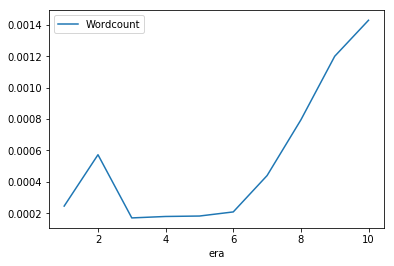

In [625]:
(progT.sum() / wordcounts).T.plot()

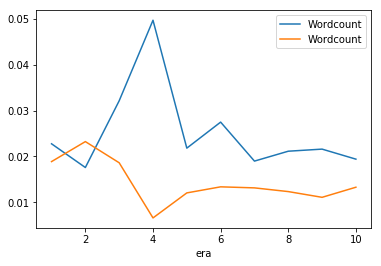

In [636]:
ax = (paT.fillna(0).sum() / wordcounts).T.plot()
(impfT.fillna(0).sum()/ wordcounts).T.plot(ax=ax)

## get lemmas that never occur in prog, impf

In [174]:
progLems = {t for t in progs.PDElem.values}
impfLems = {t for t in impfs.PDElem.values}

progOnly = progLems - impfLems
impfOnly = impfLems - progLems

In [ ]:
#See prog only's by number
progs.loc[progs.PDElem.isin(progOnly)].groupby('PDElem', sort=False).size().sort_values(ascending=False)

#See impfs only's by number
impfs.loc[impfs.PDElem.isin(impfOnly)].groupby('PDElem', sort=False).size().sort_values(ascending=False)

## Get counts for each lem

In [81]:
groupP = progs.groupby(['PDElem', 'era'])
pSize = groupP.size().to_frame('num').reset_index()

groupI = impfs.groupby(['PDElem', 'era'])
iSize = groupI.size().to_frame('num').reset_index()

In [90]:
pTable = pSize.pivot(index='PDElem', columns='era', values='num')

## Get wn hyponyms

In [110]:
from nltk.corpus import wordnet as wn
allLems = progLems | impfLems
suf = ".v.01"

allLems = allLems - {np.nan}
print(allLems)

In [136]:
wn.synset("scream"+suf).root_hypernyms()[0].name()

'utter.v.02'

In [146]:
def getHypernyms(lems):
    hpDict = dict()
    for l in lems:
        try:
            hp = wn.synset(l+suf).root_hypernyms()[0].name()
            hpDict[l] = hp
        except:
            hpDict[l] = hp
    return hpDict

lemsHP = getHypernyms(allLems)
print(lemsHP)

{'write': 'make.v.03', 'fawn': 'change.v.02', 'recross': 'change.v.02', 'clock': 'act.v.01', 'propagate': 'give.v.08', 'fellow': 'give.v.08', 'portray': 'express.v.02', 'presuppose': 'think.v.03', 'awarp': 'think.v.03', 'visit': 'travel.v.03', 'pall': 'change.v.02', 'rebuild': 'make.v.03', 'encompass': 'include.v.01', 'astroy': 'include.v.01', 'accuse': 'charge.v.02', 'radiate': 'emit.v.02', 'partake': 'exist.v.01', 'obscure': 'hide.v.01', 'value': 'determine.v.03', 'affirm': 'confirm.v.01', 'contrive': 'make.v.03', 'pat': 'touch.v.01', 'varnish': 'cover.v.01', 'actuate': 'make.v.03', 'attempt': 'act.v.01', 'umbraid': 'act.v.01', 'plot': 'think.v.03', 'awake': 'change.v.02', 'madden': 'madden.v.01', 'pamper': 'act.v.01', 'glance': 'look.v.01', 'seduce': 'induce.v.02', 'coo': 'act.v.01', 'reason': 'think.v.03', 'disclose': 'act.v.01', 'apportion': 'transfer.v.05', 'misnote': 'transfer.v.05', 'dissipate': 'separate.v.07', 'sanctify': 'express.v.02', 'quote': 'act.v.01', 'weave': 'change.

In [149]:
len(set(i for i in lemsHP.values()))

255

###  Try with prog

In [379]:
progsWN = progs
progsWN['hyper'] = progsWN['PDElem'].map(lemsHP)
progsWN.head()

exclusions = {'go', 'know', 'FIX', '*'} | progOnly | impfOnly
groupPWN = progsWN[progsWN.lemma.isin(exclusions)==False].groupby(['hyper', 'era'])
pwnSize = groupPWN.size().to_frame('num').reset_index()
progWNT = pwnSize.pivot(index='hyper', columns='era', values='num')
progWNT.head()

era,1,2,3,4,5,6,7,8,9,10
hyper,,,,,,,,,,
abstain.v.02,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
account.v.02,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act.v.01,5.0,8.0,2.0,8.0,13.0,14.0,38.0,128.0,229.0,163.0
act.v.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0
address.v.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0


### Impfs

In [380]:
impfsWN = impfs
impfsWN['hyper'] = impfsWN['PDElem'].map(lemsHP)
impfsWN.head()

exclusionsI = {'know', 'go', 'FIX', '*'} | impfOnly | progOnly
groupIWN = impfsWN[impfsWN.lemma.isin(exclusionsI)==False].groupby(['hyper', 'era'])
iwnSize = groupIWN.size().to_frame('num').reset_index()
impfWNT = iwnSize.pivot(index='hyper', columns='era', values='num')
impfWNT.head()

era,1,2,3,4,5,6,7,8,9,10
hyper,,,,,,,,,,
abstain.v.02,3.0,5.0,2.0,NaN,2.0,NaN,4.0,1.0,NaN,2.0
account.v.02,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act.v.01,660.0,350.0,1090.0,214.0,770.0,948.0,947.0,1177.0,1135.0,1121.0
act.v.02,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,3.0
address.v.02,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [277]:
#write wn versions to csv
progsWN.to_csv("progMasterV2.csv", index=False)
impfsWN.to_csv("impfMasterV3.csv", index=False)

# Get ratios

In [381]:
totals = progWNT.fillna(0).add(impfWNT.fillna(0), fill_value=0)
ratio = progWNT.fillna(0).div(totals, fill_value=0)
ratio2 = impfWNT.fillna(0).div(progWNT.fillna(0), fill_value=0)

ratio20 = impfWNT.fillna(0).div(totals[totals[10]>200], fill_value=0)

In [370]:
#progWNT[totals[10]<1300].sum() / totals[totals[10]<1300].sum()
set(impfsWN.loc[impfsWN.hyper=="act.v.01", 'PDElem'])

{'abuse',
 'acquaint',
 'acquiesce',
 'act',
 'address',
 'adduce',
 'admonish',
 'adventure',
 'advertise',
 'advise',
 'aggrieve',
 'allude',
 'ally',
 'alum',
 'amend',
 'amuse',
 'anhang',
 'announce',
 'anoure',
 'applaud',
 'appreciate',
 'approve',
 'ask',
 'aspend',
 'assent',
 'aswike',
 'aswind',
 'attempt',
 'attest',
 'augur',
 'authenticate',
 'authorize',
 'back',
 'balk',
 'banter',
 'bark',
 'bawl',
 'bay',
 'beam',
 'beckon',
 'befriend',
 'beguile',
 'bellow',
 'belook',
 'belove',
 'belt',
 'bespeak',
 'betoken',
 'betray',
 'bewield',
 'bewind',
 'bewray',
 'blunder',
 'boast',
 'bother',
 'bow',
 'brag',
 'brook',
 'buck',
 'cackle',
 'carol',
 'caution',
 'certify',
 'challenge',
 'chat',
 'cheat',
 'clarify',
 'clead',
 'clock',
 'commit',
 'commune',
 'comport',
 'condescend',
 'condition',
 'confer',
 'confide',
 'congregate',
 'consent',
 'consort',
 'consult',
 'contents',
 'contest',
 'continue',
 'convay',
 'convene',
 'converse',
 'convey',
 'coo',
 'coque

In [371]:
#only wnpreds with values in each era
totalsUni = totals.loc[totals.gt(0.0).all(axis='columns')]
ratioT = progWNT.fillna(0).div(totalsUni, fill_value=0)
ratio.loc['act.v.01']

era
1     0.007519
2     0.022346
3     0.001832
4     0.036036
5     0.016603
6     0.014553
7     0.038579
8     0.098084
9     0.167889
10    0.126947
Name: act.v.01, dtype: float64

In [649]:
progsWN.loc[progs.vbg.str.contains("nge$")].groupby(['PDElem', 'era']).size().to_frame('num').reset_index().pivot(index='PDElem', columns='era', values='num').fillna(0).sum()

era
2     3.0
3    30.0
4    15.0
5    47.0
6     6.0
7    23.0
dtype: float64

## Try this same thing without wn

Notes:
If we just look at present forms, the ratio is linear again

In [568]:
groupP = progsWN[(progsWN.PDElem.isin(exclusions)==False)].groupby(['PDElem', 'era'])
pSize = groupP.size().to_frame('num').reset_index()
progT = pSize.pivot(index='PDElem', columns='era', values='num')

groupI = impfsWN[impfsWN.PDElem.isin(exclusionsI)==False].groupby(['PDElem', 'era'])
iSize = groupI.size().to_frame('num').reset_index()
impfT = iSize.pivot(index='PDElem', columns='era', values='num')

In [637]:
groupPpres = progsWN[(progsWN.PDElem.isin(exclusions)==False) & (progsWN.beform.str.contains("BEP"))].groupby(['PDElem', 'era'])
pSizepres = groupPpres.size().to_frame('num').reset_index()
progpresT = pSizepres.pivot(index='PDElem', columns='era', values='num')

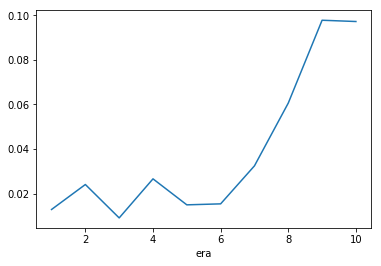

In [590]:
totals2 = progT.fillna(0).add(impfT.fillna(0), fill_value=0)
totalsGT50 = totals2[(totals2[6]>50) & (totals2[7]>50) & (totals2[8]>50) & (totals2[9]>50) & (totals2[10]>50)]
ratioNN = progT.fillna(0).div(totals2, fill_value=0)
(progT.sum() / totals2.sum()).plot()

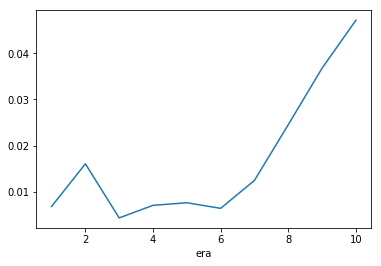

In [641]:
#present prog forms over all
(progpresT.fillna(0).sum() / totals2.sum()).plot()
#(progT.fillna(0).sum() / totals2.sum()).plot(ax=ax)

In [441]:
ratioNN.loc[(ratioNN[10]>0.2) & (totals2[10]>10) & (totals2[9]>10)]

era,1,2,3,4,5,6,7,8,9,10
PDElem,,,,,,,,,,
approach,NaN,NaN,0.000000,NaN,0.333333,0.000000,0.200000,0.166667,0.272727,0.357143
begin,0.000000,0.000000,0.000000,0.000000,0.027027,0.025641,0.037736,0.041667,0.095238,0.272727
blow,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.363636
cry,0.000000,0.200000,0.040000,0.000000,0.000000,0.000000,0.111111,0.111111,0.307692,0.214286
drive,0.000000,0.000000,0.000000,NaN,0.000000,0.111111,0.166667,0.000000,0.363636,0.266667
gain,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.055556,0.466667,0.545455
grow,0.000000,NaN,0.022222,0.000000,0.066667,0.033333,0.025974,0.033333,0.228070,0.203704
long,0.000000,0.200000,0.105263,0.066667,0.083333,0.000000,0.000000,0.071429,0.000000,0.230769
owe,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.411765,0.505376,0.477273,0.225806


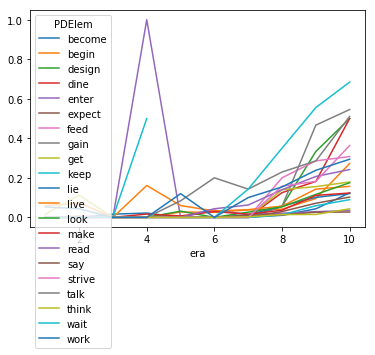

In [427]:
pChange = ratioNN.pct_change(axis="columns")
upwards = pChange.fillna(0)[(pChange[8]>=0) & (pChange[9]>=0) & (pChange[10]>0)].index.tolist()

progT.loc[upwards].fillna(0).div(totals2.loc[upwards], fill_value=0).T.plot()

In [496]:
prim = pd.concat([progT.fillna(0), impfT.fillna(0)], keys=['prog', 'impf']).swaplevel(0,1).sort_index()
prim2 = pd.concat([progT.fillna(0), impfT.fillna(0)], keys=['prog', 'impf'])

# Unembedded

In [539]:
def stripFN(lines):
    fname = []
    pattern = r'\\([a-z0-9-.]*)\.psd'
    regex = re.compile(pattern)
    for l in lines:
        fname.append(regex.search(l).group(1))
    return fname

In [543]:
impfUL = [line.rstrip('\n') for line in open('tregex-results\impfUnembedded.txt')]

fni = stripFN(impfUL[::2])

impfU = pd.DataFrame(data={'vbp':impfUL[1::2], 'fn':fni})
impfU.head(10)

,vbp,fn
0,opens,adams-1787-2
1,says,adams-1787-2
2,asserts,adams-1787-2
3,says,adams-1787-2
4,says,adams-1787-2
5,learn,adams-1787-2
6,find,adams-1787-2
7,contracts,adams-1787-2
8,gets,adams-1787-2
9,suffices,adams-1787-2


In [544]:
progUL = [line.rstrip('\n') for line in open('tregex-results\progUnembedded.txt')]

fnp = stripFN(progUL[::3])

progU = pd.DataFrame(data={'vbg':progUL[1::3], 'beform':progUL[2::3], 'fn':fnp})
progU.head(10)

,vbg,beform,fn
0,speaking,(BEP are),adams-1787-2
1,standing,(BED were),albin-1736-1
2,extolling,(BED were),andrews1-1785-2
3,owing,(BED was),andrews2-1796-2
4,endeavouring,(BEP am),anon3-1772-2
5,crossing,(BEP are),anon4-1791-2
6,building,(BEP are),anon4-1791-2
7,carrying,(BEP are),anon4-1791-2
8,living,(BEP is),anon4-1791-2
9,getting,(BEN been),anon4-1791-2


In [ ]:
fnDict = {t[4]: t[3] for t in impfs.values.tolist()}

In [557]:
impfs.loc[impfs.fn.str.contains("frost")]

,V1,lemma,PDElem,era,fn
17651,presume,presume,presume,9,frost1-1840
17652,arises,arise,arise,9,frost1-1840
17653,suggests,suggest,suggest,9,frost1-1840
17654,makes,make,make,9,frost1-1840
17655,think,think,think,9,frost1-1840
17656,says,say,say,9,frost1-1840
17657,come,come,come,9,frost1-1840
17658,states,state,state,9,frost1-1840
17659,reserve,reserve,reserve,9,frost1-1840
17660,overrules,overrule,overrule,9,frost1-1840


In [561]:
{f for f in progU['fn']} - {t[4] for t in impfs.values.tolist()}

{'frost-1840-1',
 'frost-1840-2',
 'victoria-186x-diary-2',
 'victoria-186x-private-letters-1'}

In [558]:
fnDict['frost-1840-1'] = 9
fnDict['frost-1840-2'] = 9
fnDict['victoria-186x-diary-2'] = 10
fnDict['victoria-186x-private-letters-1'] = 10

In [562]:
impfU['era'] = impfU['fn'].map(fnDict)
progU['era'] = progU['fn'].map(fnDict)

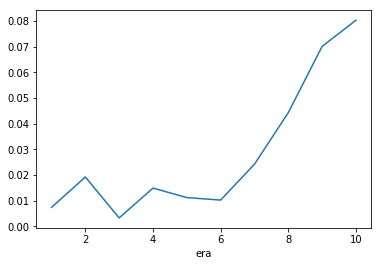

In [571]:
gP = progU.groupby(['vbg', 'era'])
pS = gP.size().to_frame('num').reset_index()
pT = pS.pivot(index='vbg', columns='era', values='num')

gI = impfU.groupby(['vbp', 'era'])
iS = gI.size().to_frame('num').reset_index()
iT = iS.pivot(index='vbp', columns='era', values='num')

totalsU = pT.fillna(0).add(iT.fillna(0), fill_value=0)

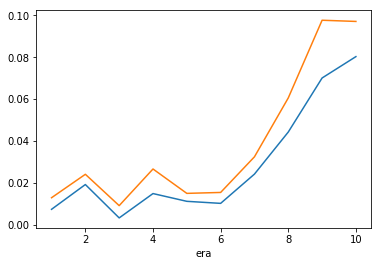

In [643]:
ax = (pT.fillna(0).sum()/totalsU.sum()).plot()
(progT.fillna(0).sum()/totals2.sum()).plot(ax=ax)

## Now trying including past tense

In [573]:
pastUL = [line.rstrip('\n') for line in open('tregex-results\pastUnembedded.txt')]

fnpstu = stripFN(pastUL[::2])

pastU = pd.DataFrame(data={'vbd':pastUL[1::2], 'fn':fnpstu})


pastAL = [line.rstrip('\n') for line in open('tregex-results\pastAll.txt')]

fnpsta = stripFN(pastAL[::2])

pastA = pd.DataFrame(data={'vbd':pastAL[1::2], 'fn':fnpsta})
pastA.head(10)

,vbd,fn
0,dried,adams-1787-2
1,exfoliated,adams-1787-2
2,covered,adams-1787-2
3,appeared,adams-1787-2
4,appeared,adams-1787-2
5,appeared,adams-1787-2
6,formed,adams-1787-2
7,extended,adams-1787-2
8,supposed,adams-1787-2
9,belonged,adams-1787-2


In [576]:
fnDict['eliz-1590-e2-p2'] = 6

In [577]:
pastU['era'] = pastU['fn'].map(fnDict)
pastA['era'] = pastA['fn'].map(fnDict)

In [580]:
gPastU = pastU.groupby(['vbd', 'era'])
pastUS = gPastU.size().to_frame('num').reset_index()
puT = pastUS.pivot(index='vbd', columns='era', values='num')

totalsUPast = puT.fillna(0).add(pT.fillna(0).add(iT.fillna(0), fill_value=0), fill_value=0)

In [585]:
gPastA = pastA.groupby(['vbd', 'era'])
pastAS = gPastA.size().to_frame('num').reset_index()
paT = pastAS.pivot(index='vbd', columns='era', values='num')

totalsAPast = paT.fillna(0).add(progT.fillna(0).add(impfT.fillna(0), fill_value=0), fill_value=0)

In [588]:
paT.fillna(0).sum()/totalsAPast.fillna(0).sum()

era
1     0.543400
2     0.424802
3     0.631057
4     0.880096
5     0.640714
6     0.669329
7     0.582891
8     0.616883
9     0.637435
10    0.568740
dtype: float64

In [584]:
iT.fillna(0).sum() / puT.fillna(0).sum()

era
1     1.431187
2     1.235036
3     0.558462
4     0.131058
5     0.592701
6     0.512224
7     0.810925
8     0.624576
9     0.623699
10    0.753304
dtype: float64

## make plots

In [87]:
import matplotlib.pyplot as plt
plt.close('all')

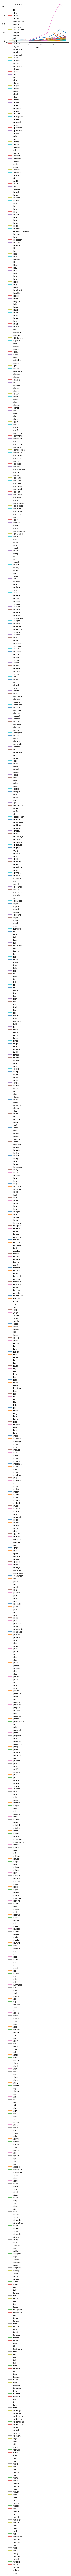

In [102]:
pTable.T.plot()

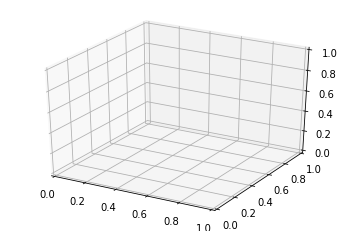

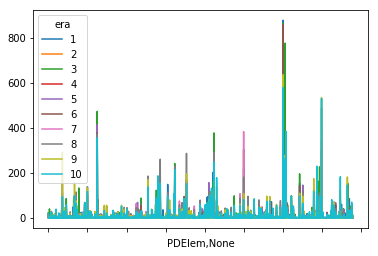

In [481]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')